In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

$ Y = 0.5X^2 + 1.5X + 2 + outliers $

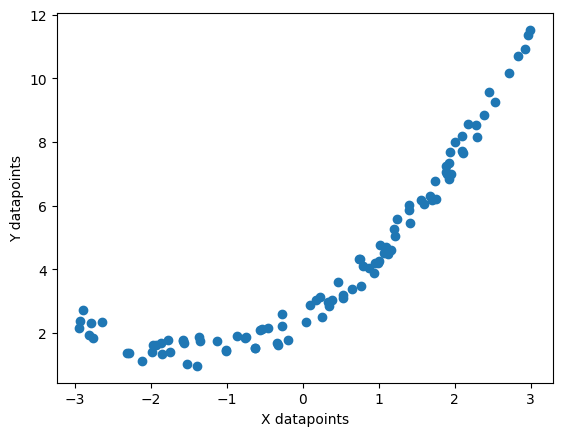

In [3]:
X = 6 * np.random.rand(100, 1) - 3
y =  0.5*X**2 + 1.5*X + 2 + np.random.rand(100, 1)
plt.scatter(X, y)
plt.xlabel('X datapoints')
plt.ylabel('Y datapoints')
plt.show()

In [4]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# simple linear regression
from sklearn.linear_model import LinearRegression
rger_1  =LinearRegression()
rger_1.fit(x_train, y_train)

LinearRegression()

In [6]:
# performance metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

r_squared = r2_score(y_test, rger_1.predict(x_test))

print('R2  : ', r_squared)

R2  :  0.5668209655073377


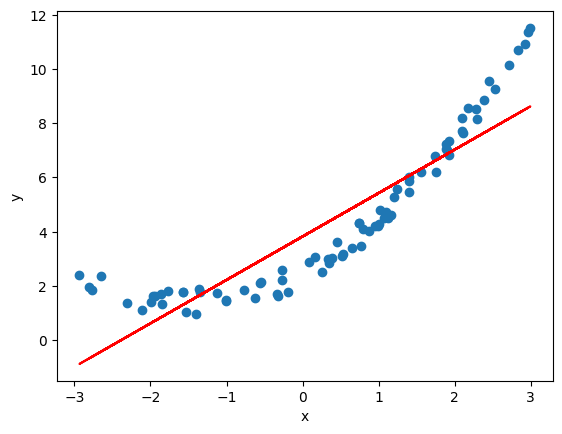

In [7]:
plt.plot(x_train, rger_1.predict(x_train), color='r')
plt.scatter(x_train, y_train)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### Polynomial regression

In [8]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=True)

x_poly_train = poly.fit_transform(x_train)
x_poly_test = poly.transform(x_test)

In [9]:
# performance metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

rger_1  =LinearRegression()
rger_1.fit(x_poly_train, y_train)

r_squared = r2_score(y_test, rger_1.predict(x_poly_test))

print('R2  : ', r_squared)

R2  :  0.9832838043473328


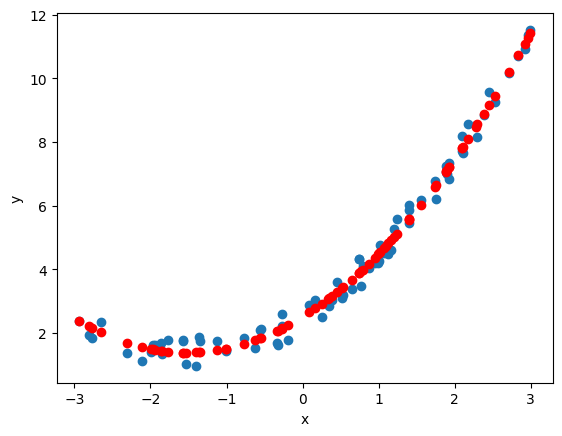

In [10]:

plt.scatter(x_train, y_train)
plt.scatter(x_train, rger_1.predict(x_poly_train), color='r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

R2  :  0.9829680247521926


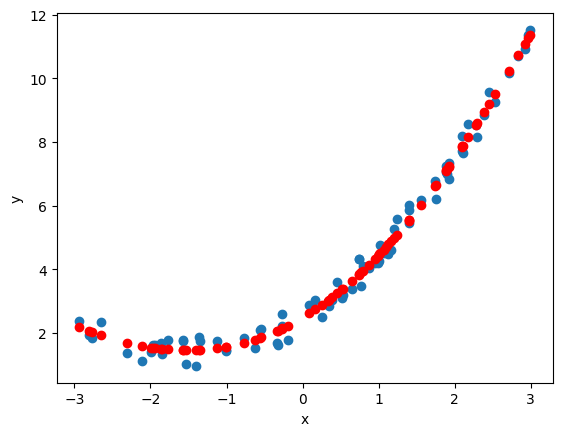

In [11]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=5, include_bias=True)

x_poly_train = poly.fit_transform(x_train)
x_poly_test = poly.transform(x_test)
# performance metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

rger_1  =LinearRegression()
rger_1.fit(x_poly_train, y_train)

r_squared = r2_score(y_test, rger_1.predict(x_poly_test))

print('R2  : ', r_squared)
plt.scatter(x_train, y_train)
plt.scatter(x_train, rger_1.predict(x_poly_train), color='r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# polynomial pipeline

In [12]:
from sklearn.pipeline import Pipeline

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:


def poly_regression(degree):
    x_new = np.linspace(-3, 3 ,200).reshape(200, 1)
    
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    lin_reg = LinearRegression()
    poly_regression = Pipeline([
        ("poly_features", poly_features),
        ("lin_reg", lin_reg)
    ])
    
    poly_regression.fit(x_train, y_train)
    y_pred_new = poly_regression.predict(x_new)
    
    # Plotting prediction line
    plt.plot(x_new, y_pred_new, "r-", label="Degree " + str(degree), linewidth=3)
    plt.plot(x_train, y_train, "b.", linewidth=3)
    plt.plot(x_test, y_test, "g.", linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-4, 4, 0, 10])
    plt.show()





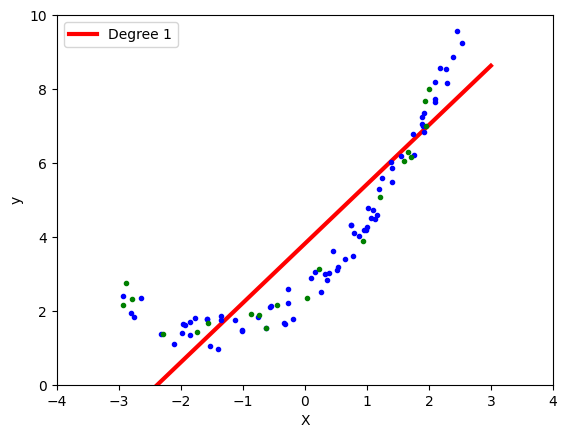

In [15]:
poly_regression(1)

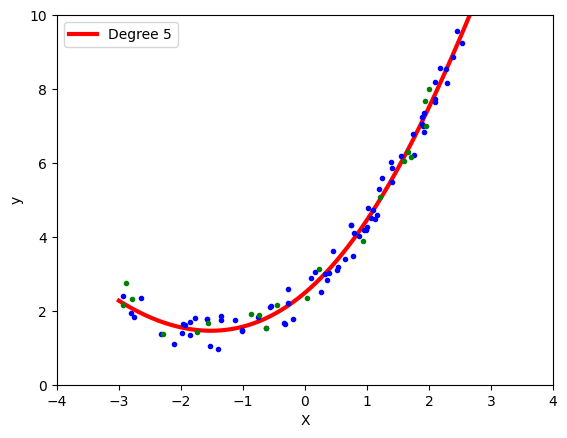

In [16]:
poly_regression(5)

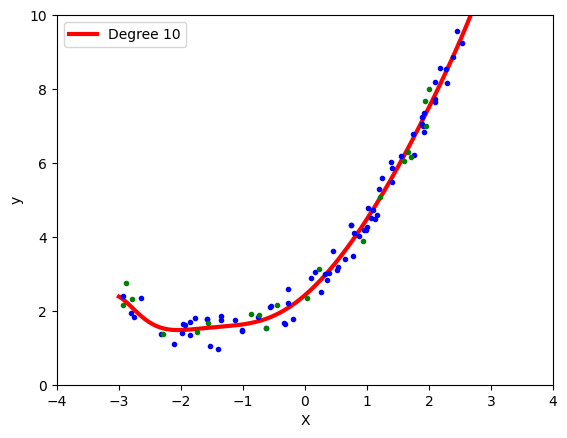

In [17]:
poly_regression(10) # overfitting

In [18]:
import pickle

pickle.dump(poly, open('poly.pkl', 'wb'))
